<a href="https://colab.research.google.com/github/jgamel/learn_n_dev/blob/python_machine_learning/Multicore_ML_Python_ScikitLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multi-Core Machine Learning in Python With Scikit-Learn

Many computationally expensive tasks for machine learning can be made parallel by splitting the work across multiple CPU cores, referred to as multi-core processing.

Common machine learning tasks that can be made parallel include training models like ensembles of decision trees, evaluating models using resampling procedures like k-fold cross-validation, and tuning model hyperparameters, such as grid and random search.

Using multiple cores for common machine learning tasks can dramatically decrease the execution time as a factor of the number of cores available on your system. A common laptop and desktop computer may have 2, 4, or 8 cores. Larger server systems may have 32, 64, or more cores available, allowing machine learning tasks that take hours to be completed in minutes.

In this tutorial, you will discover how to configure scikit-learn for multi-core machine learning.

This tutorial is divided into five parts; they are:

1. [Multi-Core Scikit-Learn](#a1)
2. [Multi-Core Model Training](#a2)
3. [Multi-Core Model Evaluation](#a3)
4. [Multi-Core Hyperparameter Tuning](#a4)
5. [Recommendations](#a5)

<a name="a1"></a>
##Multi-Core Scikit-Learn

Machine learning can be computationally expensive.

There are three main centers of this computational cost; they are:

* Training machine learning models.
* Evaluating machine learning models.
* Hyperparameter tuning machine learning models.

Worse, these concerns compound.

For example, evaluating machine learning models using a resampling technique like k-fold cross-validation requires that the training process is repeated multiple times.

* Evaluation Requires Repeated Training

Tuning model hyperparameters compounds this further as it requires the evaluation procedure repeated for each combination of hyperparameters tested.

* Tuning Requires Repeated Evaluation

Most, if not all, modern computers have multi-core CPUs. This includes your workstation, your laptop, as well as larger servers.

You can configure your machine learning models to harness multiple cores of your computer, dramatically speeding up computationally expensive operations.

The scikit-learn Python machine learning library provides this capability via the n_jobs argument on key machine learning tasks, such as model training, model evaluation, and hyperparameter tuning.

This configuration argument allows you to specify the number of cores to use for the task. The default is None, which will use a single core. You can also specify a number of cores as an integer, such as 1 or 2. Finally, you can specify -1, in which case the task will use all of the cores available on your system.

* **n_jobs:** Specify the number of cores to use for key machine learning tasks.

Common values are:

* **n_jobs=None:** Use a single core or the default configured by your backend library.
* **n_jobs=4:** Use the specified number of cores, in this case 4.
* **n_jobs=-1:** Use all available cores.

**What is a core?**

A CPU may have multiple physical CPU cores, which is essentially like having multiple CPUs. Each core may also have hyper-threading, a technology that under many circumstances allows you to double the number of cores.

For example, my workstation has four physical cores, which are doubled to eight cores due to hyper-threading. Therefore, I can experiment with 1-8 cores or specify -1 to use all cores on my workstation.

Now that we are familiar with the scikit-learn library’s capability to support multi-core parallel processing for machine learning, let’s work through some examples.

You will get different timings for all of the examples in this tutorial; share your results in the comments. You may also need to change the number of cores to match the number of cores on your system.

Note: Yes, I am aware of the timeit API, but chose against it for this tutorial. We are not profiling the code examples per se; instead, I want you to focus on how and when to use the multi-core capabilities of scikit-learn and that they offer real benefits. I wanted the code examples to be clean and simple to read, even for beginners. I set it as an extension to update all examples to use the timeit API and get more accurate timings. Share your results in the comments.

<a name="a2"></a>
## Multi-Core Model Training

Many machine learning algorithms support multi-core training via an n_jobs argument when the model is defined.

This affects not just the training of the model, but also the use of the model when making predictions.

A popular example is the ensemble of decision trees, such as bagged decision trees, random forest, and gradient boosting.

In this section we will explore accelerating the training of a RandomForestClassifier model using multiple cores. We will use a synthetic classification task for our experiments.

In this case, we will define a random forest model with 500 trees and use a single core to train the model.

```
# define the model
model = RandomForestClassifier(n_estimators=500, n_jobs=1)
```

We can record the time before and after the call to the train() function using the time() function. We can then subtract the start time from the end time and report the execution time in the number of seconds.

The complete example of evaluating the execution time of training a random forest model with a single core is listed below.

In [2]:
# example of timing the training of a random forest model on one core
from time import time
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
# define dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
# define the model
model = RandomForestClassifier(n_estimators=500, n_jobs=1)
# record current time
start = time()
# fit the model
model.fit(X, y)
# record current time
end = time()
# report execution time
result = end - start
print('%.3f seconds' % result)

19.691 seconds


We can now change the example to use all of the physical cores on the system, in this case, four.

In [3]:
# example of timing the training of a random forest model on 4 cores
from time import time
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
# define dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
# define the model
model = RandomForestClassifier(n_estimators=500, n_jobs=4)
# record current time
start = time()
# fit the model
model.fit(X, y)
# record current time
end = time()
# report execution time
result = end - start
print('%.3f seconds' % result)

13.713 seconds


We can now change the number of cores to eight to account for the hyper-threading supported by the four physical cores.

In [4]:
# example of timing the training of a random forest model on 8 cores
from time import time
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
# define dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
# define the model
model = RandomForestClassifier(n_estimators=500, n_jobs=8)
# record current time
start = time()
# fit the model
model.fit(X, y)
# record current time
end = time()
# report execution time
result = end - start
print('%.3f seconds' % result)

13.871 seconds


The complete example is listed below.

>cores=1: 21.956 seconds
>cores=2: 13.418 seconds
>cores=3: 13.525 seconds
>cores=4: 13.550 seconds
>cores=5: 14.092 seconds
>cores=6: 14.220 seconds
>cores=7: 13.621 seconds
>cores=8: 13.691 seconds


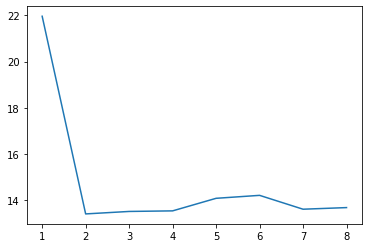

In [5]:
# example of comparing number of cores used during training to execution speed
from time import time
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
results = list()
# compare timing for number of cores
n_cores = [1, 2, 3, 4, 5, 6, 7, 8]
for n in n_cores:
	# capture current time
	start = time()
	# define the model
	model = RandomForestClassifier(n_estimators=500, n_jobs=n)
	# fit the model
	model.fit(X, y)
	# capture current time
	end = time()
	# store execution time
	result = end - start
	print('>cores=%d: %.3f seconds' % (n, result))
	results.append(result)
pyplot.plot(n_cores, results)
pyplot.show()

<a name="a3"></a>
##Multi-Core Model Evaluation

The gold standard for model evaluation is k-fold cross-validation.

This is a resampling procedure that requires that the model is trained and evaluated k times on different partitioned subsets of the dataset. The result is an estimate of the performance of a model when making predictions on data not used during training that can be used to compare and select a good or best model for a dataset.

In addition, it is also a good practice to repeat this evaluation process multiple times, referred to as repeated k-fold cross-validation.

The evaluation procedure can be configured to use multiple cores, where each model training and evaluation happens on a separate core. This can be done by setting the n_jobs argument on the call to cross_val_score() function; for example:

We can explore the effect of multiple cores on model evaluation.

First, let’s evaluate the model using a single core.

```
# evaluate the model
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=1)
```

We will evaluate the random forest model and use a single core in the training of the model (for now).

```
# define the model
model = RandomForestClassifier(n_estimators=100, n_jobs=1)
```


In [6]:
# example of evaluating a model using a single core
from time import time
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
# define the model
model = RandomForestClassifier(n_estimators=100, n_jobs=1)
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# record current time
start = time()
# evaluate the model
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=1)
# record current time
end = time()
# report execution time
result = end - start
print('%.3f seconds' % result)

10.660 seconds


**Multi Core**

In [8]:
# example of evaluating a model using 8 cores
from time import time
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
# define the model
model = RandomForestClassifier(n_estimators=100, n_jobs=1)
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# record current time
start = time()
# evaluate the model
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=2)
# record current time
end = time()
# report execution time
result = end - start
print('%.3f seconds' % result)

8.024 seconds


Test and record different number of Cores

>cores=1: 11.655 seconds
>cores=2: 7.803 seconds
>cores=3: 8.451 seconds
>cores=4: 8.761 seconds
>cores=5: 8.874 seconds
>cores=6: 8.915 seconds
>cores=7: 9.182 seconds
>cores=8: 9.136 seconds


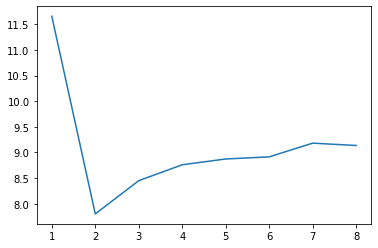

In [9]:
# compare execution speed for model evaluation vs number of cpu cores
from time import time
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
results = list()
# compare timing for number of cores
n_cores = [1, 2, 3, 4, 5, 6, 7, 8]
for n in n_cores:
	# define the model
	model = RandomForestClassifier(n_estimators=100, n_jobs=1)
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# record the current time
	start = time()
	# evaluate the model
	n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=n)
	# record the current time
	end = time()
	# store execution time
	result = end - start
	print('>cores=%d: %.3f seconds' % (n, result))
	results.append(result)
pyplot.plot(n_cores, results)
pyplot.show()

We can also make the model training process parallel during the model evaluation procedure.

Although this is possible, should we?

To explore this question, let’s first consider the case where model training uses all cores and model evaluation uses a single core.

```
...
# define the model
model = RandomForestClassifier(n_estimators=100, n_jobs=8)
...
# evaluate the model
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=1)
```



In [10]:
# example of using multiple cores for model training but not model evaluation
from time import time
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
# define the model
model = RandomForestClassifier(n_estimators=100, n_jobs=8)
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# record current time
start = time()
# evaluate the model
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=1)
# record current time
end = time()
# report execution time
result = end - start
print('%.3f seconds' % result)

17.532 seconds


What if we split the number of cores between the training and evaluation procedures?

In [11]:
# example of using multiple cores for model training and evaluation
from time import time
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
# define the model
model = RandomForestClassifier(n_estimators=100, n_jobs=8)
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=4)
# record current time
start = time()
# evaluate the model
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=4)
# record current time
end = time()
# report execution time
result = end - start
print('%.3f seconds' % result)

9.364 seconds


We can see an improvement over training with all cores and evaluating with one core, but at least for this model on this dataset, it is more efficient to use all cores for model evaluation and a single core for model training.

<a name="a4"></a>
## Multi-Core Hyperparameter Tuning

It is common to tune the hyperparameters of a machine learning model using a grid search or a random search.

The scikit-learn library provides these capabilities via the GridSearchCV and RandomizedSearchCV classes respectively.

Both of these search procedures can be made parallel by setting the n_jobs argument, assigning each hyperparameter configuration to a core for evaluation.

The model evaluation itself could also be multi-core, as we saw in the previous section, and the model training for a given evaluation can also be training as we saw in the second before that. Therefore, the stack of potentially multi-core processes is starting to get challenging to configure.

In this specific implementation, we can make the model training parallel, but we don’t have control over how each model hyperparameter and how each model evaluation is made multi-core. The documentation is not clear at the time of writing, but I would guess that each model evaluation using a single core hyperparameter configuration is split into jobs.

Let’s explore the benefits of performing model hyperparameter tuning using multiple cores.

First, let’s evaluate a grid of different configurations of the random forest algorithm using a single core.

In [12]:
# example of tuning model hyperparameters with a single core
from time import time
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
# define the model
model = RandomForestClassifier(n_estimators=100, n_jobs=1)
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['max_features'] = [1, 2, 3, 4, 5]
# define grid search
search = GridSearchCV(model, grid, n_jobs=1, cv=cv)
# record current time
start = time()
# perform search
search.fit(X, y)
# record current time
end = time()
# report execution time
result = end - start
print('%.3f seconds' % result)

47.615 seconds


Running the example tests different values of the max_features configuration for random forest, where each configuration is evaluated using repeated k-fold cross-validation.

We can now configure the grid search to use all available cores on the system.

In [13]:
# example of tuning model hyperparameters with 8 cores
from time import time
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
# define the model
model = RandomForestClassifier(n_estimators=100, n_jobs=1)
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['max_features'] = [1, 2, 3, 4, 5]
# define grid search
search = GridSearchCV(model, grid, n_jobs=2, cv=cv)
# record current time
start = time()
# perform search
search.fit(X, y)
# record current time
end = time()
# report execution time
result = end - start
print('%.3f seconds' % result)

35.430 seconds


Intuitively, we would expect that making the grid search multi-core should be the focus and not model training.

Nevertheless, we can divide the number of cores between model training and the grid search to see if it offers a benefit for this model on this dataset.

In [15]:
# example of multi-core model training and hyperparameter tuning
from time import time
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
# define the model
model = RandomForestClassifier(n_estimators=100, n_jobs=1)
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['max_features'] = [1, 2, 3, 4, 5]
# define grid search
search = GridSearchCV(model, grid, n_jobs=1, cv=cv)
# record current time
start = time()
# perform search
search.fit(X, y)
# record current time
end = time()
# report execution time
result = end - start
print('%.3f seconds' % result)

49.559 seconds
